

<H1 style="background-color:#00008b;color:#F8F8FF;"><center>Project Report - Phillip Marsh</center></H1>
<hr>

<H2 style="color:#00008b;">GitHub URL</H2>
Phillip's GutHub can be found at: <a href="https://github.com/PhillipNM/UCDPA_PhillipMarsh" target="_blank">Phillip's GitHub Repository</a>
<pre style="font-family:arial;">
document should contain between 1,500 and 2,00 words
</pre>

<h2 style="color:#00008b;">Abstract</h2>

(short overview of the entire project)

<h2 style="color:#00008b;">Introduction</h2>

(Explain why you chose this project use case)

After considering serveral ideas and researching the available dataset I decide on a dataset I am fairly familiar with from a reporting point of view (as part of the business continuity team) but that I had not done much with the other than create some metrics using Tableau.  I wondered if we could predict confidently that countries with lower population densities or high GDP per capita fared better than higher density countries or lower GDP.

<h2 style="color:#00008b;">Datasets</h2>
(Provide a description of your dataset and source. Also justify why you chose this source)

<h6>Deciding on the dataset</h6>
<br>
I had several ideas, however, I explored three main ideas:

<pre style="font-family:arial;">
1. Predicting currency fx changes to maximise buys and sells.
As I have two children in Canada in university the fx rate for USD to CAD is always top of mind.  After exploring this for a bit the challenge to understand the market conditions that I could use for making predictions did not seem to fit well with what I needed for this project.
2. Flight delays, cancellations and the average compensation.  Are the airlines "gaming" the system to not pay-out customers given the turmoil in travel I thought it would be interesting to compare recent cancellations, delays and reasons and compensations vs. pre-covid data. I researched for datasets but could not find anything current, although there were some sites that may have had data; I would have to pay for and for this reason I decided against this topic.
3. COVID data.  This idea would have plenty of source data out there but would it offer the ability to make predictions and not just forecasting trends.
</pre>

<h6>COVID Data</h6>
   I picked the COVID idea as there is good data and the types of calculations and techniques required would lend itself to the project easily. This data is something we are all very familiar with at this time. Governments, countries, organizations and corporations have struggled with rules and regulations trying to balance controlling the epidemic vs. economic stability.

I reviewed a couple of sources and in the end selected "Our World In Data" (OWID).  OWID has a comprehensive set of publicly available data specifically for COVID.  In working with the FIL business continuity team, I assited with the COVID response. I came across this data source and found it very useful. In the end this is the source we used to provide global situational updates for the senior members in the organization so they could decide on stay at home and return to office responses for each jurisdiction across the organization.

source of covid data: https://github.com/owid/covid-19-data/tree/master/public/data 
<p>Originally I downloaded a (.csv) copy of the data to use but the file was large (I was getting an error that the file was to big for my type of GitHub repository account). this occured when I pushed the data to my GitHub repository.  I then researched how I could link to an external csv file, and this solved the problem.  This file creats the opportunity to use current data.  However, I noticed that the most current days data is not 100% populated so I have adjusted to used the most recent data - two days.</p>

source of GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false
<p>the file is a zip file which is difficult to connect to so in this instance I downloaded the file and unzipped it.</p>


<h2 style="color:#00008b;">Implementation Process</h2>
(describe your entire process in detail)

<h6>Hypothesis</h6>
My hypothesis is that countries with higher population density and lower GDP have higher mortality rates than for higher density higher GDP countries. It would also be interesting to see how lower density and higher GDP countries fared and if density and GDP are a predicor of mortaility for a disease like COVID

<pre style="font-family:arial;">
The implementation process I followed was
    Gather Data
    Transform & clean
    Explore
    Analyze and build models
</pre
>    
<h6>Gather Data</h6>
There are several measures I need for my analysis if any of the data sets include 0 values for total I will use the prior days data as total are cumlative
<pre style="font-family:arial;">
Measures for each country:
    Highest Cases per 100k people: for year end 2020, 2021 and latest 2022
    Highest Deaths per 100k people: for year end 2020, 2021 and latest 2022
    Lowest Cases per 100k people: for year end 2020, 2021 and latest 2022
    Lowest Deaths per 100k people: for year end 2020, 2021 and latest 2022
    Look at the 14 day rolling average cases per 100k people over time
    Look at the 14 day rolling average deaths per 100k people over time
    Population density
    GDP per person
</pre>
<h6>Transform & Clean and Explore</h6>
Review data for size and complexity, NaNs and missing values. Use techiques like 
<pre style="font-family:arial;">
    .head()
    .tail()
    .info()
    .shape()
    .isna().sum()
to understand the number of columns, count of records and the type of object being used, like strings, dates, intergers and floats. Review the null records and get a sum to understand the completeness of the data, and functions to assit with exploring the data like creating a rolling n day average and calulation for the total on a per 100,00 of the population for comparatives
</pre>

<h6>Analyze and build models</h6>
Take the top 20: 
    Categorize as High, Low for mortality and add to the data set.  This will allow some of the linear regression models for correlations

Run agaisnt the machine learnng logic for insights


<h3>Import and review the data</h3>

In [1]:
# Import packages needed for project:
import pandas as pd
import requests
import io
import datetime as dt
from datetime import datetime
from datetime import timedelta
import numpy as np
from collections import Counter
import re
import sklearn

# Visualization
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sns

# Machine learning
#from sklearn.module import Model
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


<h5>create global variables</h5>

In [2]:
#how many columns are too many to wrangle
column_count_limit=30 #number of columns deemed to be managble for exploring data
#this will allow a use to run a calculation to high light if a detset has a large number of columns

#number of days used in rolling average default = 14 but user could change to 25,30 etc. depending on what timeframe 
#is relevant
days_calc = 14 #n days for calculations. 

top_n_parameter = 10 #variable to use for select the number of top and bottom records

pop_per_100k = 100000 #varibale to set for total cases and deaths per population

#for calculations relating to mortality
high_deaths_per_100k = 50
low_deaths_per_100k = 10
# I decide on this after reviewing the min and maxk values for the topn records for each year end

<h4>Gather data</h4>

In [3]:
# Import COVID data

# Link and download COVID dataset from OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
download = requests.get(url).content

# Create the COVID as a pandas dataframe
covid_data_raw = pd.read_csv(io.StringIO(download.decode('utf-8')),parse_dates=['date']) #need to parse the date field
#source: https://stackoverflow.com/questions/59004960/converting-date-format-in-a-dataframe-from-a-csv-file


review of covid header details:

In [4]:
covid_data_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


a quick review show there are a lot of columns of which most will be irrelivant.  There also records with NaN which will have to be dealt with as they would impact calulations.

In [5]:
# Import World Bank GDP data
    # source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false

    # Create the GDP raw file as a pandas dataframe, headers start on row 4
gdp_data_raw = pd.read_csv("/Users/Phillip/UDCPA_PhillipMarsh/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4489151.csv", skiprows=4)


review of global gdp details:

In [6]:
gdp_data_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN


a quick review shows there are also alot of columns of year dat most of which would not be relevant.  This data also uses 3 digit ISO codes which means I can use it to join to data if need be.

create global calculations to be used in the analysis

there are a few calculations that will be used repeatedly and it makes sense to put them at the start of teh project so they are easy to find if changes need to be made

In [7]:
#global calculation

# What are the range of dates in data
beg_date = min(covid_data_raw["date"]) #starting point of the available data
end_date = max(covid_data_raw["date"]) #most recent data in the file

#calculate the lastest observation form the covid data, this data is dynamic and new data comes in each day, however, 
#it can take time for new data to roll in.  This report is using the last date available less 2 days 
last_date = end_date - timedelta(2) 

print("The COVID data starts on "+str(beg_date)+" and the most recent date is "+str(end_date))

The COVID data starts on 2020-01-01 00:00:00 and the most recent date is 2022-09-17 00:00:00


<h5>Exploring the data</h5>

Review the headers, number of headers, type of data to undestand more about the data available

In [8]:
# name of a dataframe with comment before and after

def name_obj(df, comment, comment2=""):
    """Create statement naming the dataframe around comment and comment2
    
    Args:
        df (dataFrame): the name of the dataframe
        comment (string): comment string which goes before the name of the dataframe
        comment2 (string): comment string which goes after the name of the dataframe (optional)
    """
    name =[x for x in globals() if globals()[x] is df][0]
    return (comment+name+comment2)

covid_data_raw_name = name_obj(covid_data_raw,"Dataframe Name is:")
gdp_data_raw_name = name_obj(gdp_data_raw,"Dataframe Name is:")

#example: test the function
print("There are two primary sourced datasets used in this project:")
print(covid_data_raw_name)
print(gdp_data_raw_name)

There are two primary sourced datasets used in this project:
Dataframe Name is:covid_data_raw
Dataframe Name is:gdp_data_raw


In [9]:
# create functions for reviewing dataframe headers

# create a function to make list from the column header names of a dataframe
def column_headers_list(df):
    """create a list of column headers
    
    Args:
        df (DataFrame): the name of the dataframe to use
    
    Returns:
        list of column headers
    """
    
    columns_lst = df.columns.tolist() # create a list of the column headers from the dataframe
        
    return columns_lst


In [10]:
# Count the number of items in the list from the column header names list of a dataframe

#test the function "column_headers_list"

# Raw Covid data 
columns_lst_test = column_headers_list(covid_data_raw)
columns_len_test = len(columns_lst_test)

# Test function
#print(columns_lst_test)
#print(columns_len_test)


# Raw gdp data 
columns_lst_test = column_headers_list(gdp_data_raw)
#print("There are :"+str(columns_len_test)+" header records")

# Test function
#print(columns_lst_test)
#print("There are :"+str(columns_len_test)+" header records")



In [11]:
# create a function determine if the data set is too wide
def columns_comment(xlist,column_count_limit=30):
    """Use column_len to decide if the dataframe is too large to manage
    
    Args:
        xlist(list): list to review
        columns_len(int): from column_headers_list function
        column_count_limit(float): limi number of columns to compare
    """
    columns_len = len(xlist)
    
    if columns_len>column_count_limit:
        comment = "There are many columns ("+str(columns_len)+"), Drop a some of them to imporve performance and the size of the file"
    else:
        comment = "Number of columns appears manageable"
    
    return comment, columns_len



we can see both datasets contain quite alot of columns with data

<h6>COVID Raw Data</h6>

In [12]:
# review Covid raw data

# show the column headers and the number of columns

data = covid_data_raw

columns_len = data.shape[1] # count the number of columns in the list

covid_name = name_obj(data,"The headers from the", "Dataframe are:")
print(column_headers_list(data))

print()

description_covid_raw = name_obj(data,"The "," DataFrame has "+str(columns_len)+" columns")
#print(description_covid_raw)

print()

#print(columns_comment(column_headers_list(df))) #xlist,column_count_limit=30)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [13]:
#test function columns_comment()

# test for covid data
columns_lst_covid = column_headers_list(covid_data_raw) #list of headers

comment_covid = columns_comment(columns_lst_covid,)[0] #Comment string
header_len_covid = columns_comment(columns_lst_covid,column_count_limit=30)[1] #Number of items in list

print("for the COVID raw file")
print(comment_covid)

print("-"*100)

for the COVID raw file
There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


In [14]:
# test for gdp data
columns_lst_gdp = column_headers_list(gdp_data_raw)

comment_gdp = columns_comment(columns_lst_gdp)[0]
header_len_gdp = columns_comment(columns_lst_gdp,column_count_limit=30)[1]

print("for the gdp raw file")
print(comment_gdp)

print("-"*100)

for the gdp raw file
There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


use the shape function to summarize the total number of rows and columns for each dataset:

In [15]:
# Understanding the data 

# Information (shape) on are the records + columns

# covid raw data
print("The COVID data shape shows:")
print(covid_data_raw.shape)
print()
print("The GDP data shape shows:")
# gdp raw data
print(gdp_data_raw.shape)

The COVID data shape shows:
(217278, 67)

The GDP data shape shows:
(266, 67)


There are also a lot of records for the COVID data, we should limit the number of days to review, but lets remove many of the columns and create a new covid_data DataFrame from the raw file

In [16]:
# drop columns
    #source: https://datatofish.com/drop-columns-pandas-dataframe/#:~:text=Here%20is%20the%20approach%20that%20you%20can%20use,Python%20code%20to%20drop%20the%20%E2%80%98Shape%E2%80%99%20column%20is%3A
covid_data = covid_data_raw.drop([
    'continent',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'tests_per_case',
    'tests_units',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index','median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million',
    'total_cases_per_million',
    'new_cases_per_million',
    'total_deaths_per_million',
    'new_deaths_per_million',
    'reproduction_rate',
    'people_vaccinated',
    'total_boosters',
    'new_vaccinations',
    'new_tests_smoothed_per_thousand',
    'new_tests',
    'positive_rate'
    ], 
    axis=1)

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217278 entries, 0 to 217277
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 217278 non-null  object        
 1   location                 217278 non-null  object        
 2   date                     217278 non-null  datetime64[ns]
 3   total_cases              208374 non-null  float64       
 4   new_cases                208084 non-null  float64       
 5   total_deaths             189322 non-null  float64       
 6   new_deaths               189248 non-null  float64       
 7   icu_patients             27679 non-null   float64       
 8   total_tests              79387 non-null   float64       
 9   total_vaccinations       60774 non-null   float64       
 10  people_fully_vaccinated  55335 non-null   float64       
 11  population               216007 non-null  float64       
 12  population_densi

Using the .info() function we now have 14 columns that look relevant to the analysis, how many countries are there

In [17]:
# all but the first three columns are float objects; two: "iso_code", "location" are country specific categories
# create a function to get a list of unique values

# Function to get unique values
  
  
def unique(list1):
  
    # Print directly by using * symbol
    print(*Counter(list1))


In [18]:
#list of covid countrie ISO code

# sort by ISO_code and Date
covid_data = covid_data.sort_values(['iso_code', 'location', 'date'])

#create a list of country codes from the covid data
Country_lst_covid_1 = covid_data["iso_code"].tolist()

# list the country codes    
country_iso_list = unique(Country_lst_covid_1)


ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN OWID_AFR OWID_ASI OWID_CYN OWID_EUN OWID_EUR OWID_HIC OWID_INT OWID_KOS OWID_LIC OWID_LMC OWID_NAM OWID_OCE OWID_SAM OWID_UMC OWID_WRL PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB V

Review of this object shows there are some ISO_Codes that are more than the standard 3 char length, these should be removed these are related to OWID codes for regional aggregations of country data, they can be removed

In [19]:
# Review of this object shows there are some ISO_Codes that are more than the standard 3 char length, these should be removed
# these are related to OWID codes for regional aggregations of country data, they can be removed
# convert to strin and find the OWID character pattern or the pattern is not 3 letters \w\w\w

#find_non_ISO_codes = re.complie(r')
#re.search(r"'OWID",country_iso_list)

In [20]:
# drop the "OWID_" records

# how many records have the OWID ISO_Code?
covid_data_owid = covid_data[covid_data["iso_code"].str.contains("OWID")] #OWID data
print("OWID data shape: "+str(covid_data_owid.shape))

covid_data = covid_data[covid_data["iso_code"].str.contains("OWID")==False] #Non OWID data
print("Non OWID data shape: "+str(covid_data.shape))


OWID data shape: (13739, 15)
Non OWID data shape: (203539, 15)


We can now see much fewer record and I have kept a copy of the OWID aggregate data in case there is time to look at this data further

In [21]:
# list the country ISO Codes again
Country_lst_covid_1 = covid_data["iso_code"].tolist()

#re-run the unique records; OWID records are no longer displayed
country_ISO_list = unique(Country_lst_covid_1)

ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB VAT VCT VEN VGB VIR VNM VUT WLF WSM YEM ZAF ZMB ZWE


this look better the 3 digit codes line up nicely and all look correct now

In [22]:
# show the column headers and the number of columns

df_head = covid_data

columns_len = df_head.shape[1] # count the number of columns in the list

#print(name_obj(df_head,"The headers from the ", " DataFrame are:"))
#column_headers_list(df_head)


In [23]:
# print a summary of covid_data

# Summary of covid_data_raw file
rows = covid_data.shape[0]
cols = covid_data.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}"),"and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 203,539 rows of data and 15 columns
Number of columns appears manageable


lets deal with the nulls

In [24]:
covid_data.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN


In [25]:
covid_data.tail(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217277,ZWE,Zimbabwe,2022-09-17,256988.0,49.0,5598.0,2.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


In [26]:
# Review Null data
# pd.set_option('display.max_rows',None)
print("Null data:")
print(covid_data.isna().sum())

Null data:
iso_code                        0
location                        0
date                            0
total_cases                  8580
new_cases                    8877
total_deaths                27438
new_deaths                  27691
icu_patients               175860
total_tests                124340
total_vaccinations         150747
people_fully_vaccinated    155992
population                      0
population_density          12489
gdp_per_capita              27574
extreme_poverty             89405
dtype: int64


review of the columns and null data shows iso_code, loaction (country), date, population are fully populated

population density is not populated for everything, will need to confirm that for the selected date that his is improved

total_cases, new_cases, total_deaths, new_deaths etc I would expect null data as data would not be available for all 
countries from the start of the data period, need to convert these to 0's

need to review "gdp_per_capita" and "population_density" data as that could impact report later on

In [27]:
#Which fields have nan's
covid_data[covid_data.isna().any(axis=1)]


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


In [28]:
# review "gdp_per_capita" and "population_density"

covid_data_gdp_pop = covid_data[["date","iso_code","location","population","population_density","gdp_per_capita"]]

covid_data_gdp_pop["population"].isnull()

#covid_data_gdp_pop[covid_data_gdp_pop.isna().any(axis=1)]

9371      False
9372      False
9373      False
9374      False
9375      False
          ...  
217273    False
217274    False
217275    False
217276    False
217277    False
Name: population, Length: 203539, dtype: bool

as i only plan on using certain dates, specifically year end and the most recent for the current year, dropping these NaN records should not impact the report too much

In [29]:
# drop the NaN for the population and gdp columns
covid_data.dropna(subset=["population","population_density","gdp_per_capita"])
#https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9372,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9373,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9374,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
9375,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.800,35973.781,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,NaN,NaN,NaN,NaN,15993524.0,42.729,1899.775,21.4


next look at "total" columns that have NaNs that should really be 0s.  Many of these NaNs are form the earlier dates when there weren't many cases

In [30]:
# change the NaN's to 0 for the remainder valuations
covid_data = covid_data.fillna(0)

In [31]:
covid_data


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
9371,ABW,Aruba,2020-03-13,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9372,ABW,Aruba,2020-03-14,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9373,ABW,Aruba,2020-03-15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9374,ABW,Aruba,2020-03-16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
9375,ABW,Aruba,2020-03-17,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,106536.0,584.800,35973.781,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217273,ZWE,Zimbabwe,2022-09-13,256904.0,16.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217274,ZWE,Zimbabwe,2022-09-14,256939.0,35.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217275,ZWE,Zimbabwe,2022-09-15,256939.0,0.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4
217276,ZWE,Zimbabwe,2022-09-16,256939.0,0.0,5596.0,0.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4


Summary of the COVID dataset

In [32]:
# How many records am I dealing with

#total_records = covid_data.count(axis=1)
#print(total_records)
#print("")

# show the countries/ locations in the data
print("ISO codes and Country")
print(covid_data.pivot_table(index = ["iso_code", "location"], aggfunc ="size"))

print("")
# df.size
print("Size:")
print(covid_data.size)

print("")
# df.isnull()
column_picker ="total_deaths"
covid_ttl_deaths = covid_data.filter(["iso_code", "location",column_picker])
bool_series_null =pd.isnull(covid_ttl_deaths[column_picker])

print("Null",column_picker,": ")
print(covid_ttl_deaths[bool_series_null])
#print(covid_data.isnull())

print("")
# df.notnull()
bool_series = pd.notnull(covid_ttl_deaths[column_picker])
print("Not null:")
print(covid_ttl_deaths[bool_series])

print("")
# df.describe()
print("Describe:")
print(covid_data.describe)


ISO codes and Country
iso_code  location    
ABW       Aruba           919
AFG       Afghanistan     937
AGO       Angola          912
AIA       Anguilla        904
ALB       Albania         936
                         ... 
WSM       Samoa           669
YEM       Yemen           891
ZAF       South Africa    954
ZMB       Zambia          914
ZWE       Zimbabwe        912
Length: 229, dtype: int64

Size:
3053085

Null total_deaths : 
Empty DataFrame
Columns: [iso_code, location, total_deaths]
Index: []

Not null:
       iso_code  location  total_deaths
9371        ABW     Aruba           0.0
9372        ABW     Aruba           0.0
9373        ABW     Aruba           0.0
9374        ABW     Aruba           0.0
9375        ABW     Aruba           0.0
...         ...       ...           ...
217273      ZWE  Zimbabwe        5596.0
217274      ZWE  Zimbabwe        5596.0
217275      ZWE  Zimbabwe        5596.0
217276      ZWE  Zimbabwe        5596.0
217277      ZWE  Zimbabwe        5598.0



Looks much better there are now now nulls for the Ttoa_deaths which will allow caculations to be performed

<h6>GDP Raw Data</h6>

In [33]:
# review GDP data

#look at info for gdp data
print("shape of the GDP raw data:")
print(gdp_data_raw.shape)
print()


shape of the GDP raw data:
(266, 67)



drop many of the year columns as the covid data does not go back that far

In [34]:
# do not need most of the columns so will remove cols 4:63
gdp_data = gdp_data_raw.drop(gdp_data_raw.iloc[:,4:63],axis = 1)

#gdp_data = gdp_data_1.drop(gdp_data_raw.iloc[:,7],axis = 1)

#convert the spaces " " to underscore "_" consitent with the COVID data
gdp_data.columns = [c.replace(' ', '_') for c in gdp_data.columns]

print(gdp_data.info())
print()
print(gdp_data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Name    266 non-null    object 
 1   Country_Code    266 non-null    object 
 2   Indicator_Name  266 non-null    object 
 3   Indicator_Code  266 non-null    object 
 4   2019            255 non-null    float64
 5   2020            251 non-null    float64
 6   2021            229 non-null    float64
 7   Unnamed:_66     0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 16.8+ KB
None

                  Country_Name Country_Code     Indicator_Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current

In [35]:
# show the column headers and the number of columns

columns_len = gdp_data.shape[1] # count the number of columns in the list
gdp_data_name = name_obj(gdp_data,"The headers from the ", " Dataframe are:")

print(gdp_data_name)
columns_lst_gdp = column_headers_list(gdp_data)
print(columns_lst_gdp)

print()

print(name_obj(gdp_data,"The "," DataFrame has "+str(columns_len)+" columns"))

print()

#print(columns_comment())

The headers from the gdp_data Dataframe are:
['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', '2019', '2020', '2021', 'Unnamed:_66']

The gdp_data DataFrame has 8 columns



GDP data looks much better and is ready if I need it

In [36]:
# Correlations of the gdp_data
gdp_data.corr()

,2019,2020,2021,Unnamed:_66
2019,1.000000,0.999882,0.99950,NaN
2020,0.999882,1.000000,0.99963,NaN
2021,0.999500,0.999630,1.00000,NaN
Unnamed:_66,NaN,NaN,NaN,NaN


<h4>Summary of data</h4>

In [37]:
# Summary of Covid data
print("summary of Covid data")
print()

# Number of unique countries
n = covid_data.iso_code.nunique()
print("No of unique countries (covid_data):",n)

print("")

# Number of unique dates
n = covid_data.date.nunique()



print("No of unique dates: ",n)
print("From: ",beg_date.strftime("%b %d %Y")," to: ",end_date.strftime("%b %d %Y"))
print("")

# Number of records
rec = covid_data.shape[0]
col = covid_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 
#source: https://stackoverflow.com/questions/60934535/format-integer-with-comma-using-python-printf
print("")

summary of Covid data

No of unique countries (covid_data): 229

No of unique dates:  991
From:  Jan 01 2020  to:  Sep 17 2022

No of rows:  203,539
No of columns:  15



In [38]:
# Summary of GDP data

print("summary of GDP Data")
print()


# Number of unique countries
n = gdp_data.Country_Code.nunique()
print("No of unique countries: ",n)
print("")

# Number of records
rec = gdp_data.shape[0]
col = gdp_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 

summary of GDP Data

No of unique countries:  266

No of rows:  266
No of columns:  8


<h6>calculations for reporting</h6>

In [39]:
# Calculations for report:

# date calculations
# There needs to be a n_day (number of days) total for certain total columns to in turn calculate 
# comparative data against 100k of a countries population


to create a rolling ndays average per 100k, I need to identify the date and go back 14days unless that date is with in 14days of the start of the dataset

In [40]:
# n day calculations can't begin until the nth day after the first date in the dataset (beg_date)
first_calc_date = beg_date +  timedelta(days=days_calc)
print("Begining Date: "+str(beg_date)+"; Earliest starting date for calculations: "+str((first_calc_date)))

# calculate the start date for the n days data for each record
n_day_start = covid_data["date"] - timedelta(days=days_calc)
print()
print("show that the dates are populating with different results")
print(n_day_start)
print("its working")
print()

# Insert a column with the n day start date, this shows when the n days rolling date can start calculating
covid_data.insert(loc=3, column="n_day_start_date", value=n_day_start, allow_duplicates=False) 
#false will not allow the column to be entered more than once


Begining Date: 2020-01-01 00:00:00; Earliest starting date for calculations: 2020-01-15 00:00:00

show that the dates are populating with different results
9371     2020-02-28
9372     2020-02-29
9373     2020-03-01
9374     2020-03-02
9375     2020-03-03
            ...    
217273   2022-08-30
217274   2022-08-31
217275   2022-09-01
217276   2022-09-02
217277   2022-09-03
Name: date, Length: 203539, dtype: datetime64[ns]
its working



In [41]:
print(covid_data.info())
print("the new column is now appearing")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203539 entries, 9371 to 217277
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 203539 non-null  object        
 1   location                 203539 non-null  object        
 2   date                     203539 non-null  datetime64[ns]
 3   n_day_start_date         203539 non-null  datetime64[ns]
 4   total_cases              203539 non-null  float64       
 5   new_cases                203539 non-null  float64       
 6   total_deaths             203539 non-null  float64       
 7   new_deaths               203539 non-null  float64       
 8   icu_patients             203539 non-null  float64       
 9   total_tests              203539 non-null  float64       
 10  total_vaccinations       203539 non-null  float64       
 11  people_fully_vaccinated  203539 non-null  float64       
 12  population   

create the n_rolling days functions and insert into the DataFrame

In [42]:
# n days totals 
# (https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas)
# https://python.tutorialink.com/calculate-14-day-rolling-average-on-data-with-two-hierarchies/

covid_data.sort_values(['iso_code','date'], ascending=(True,True), inplace=True)

# Rolling new cases 
rolling_new_cases = covid_data.groupby(['iso_code'])['new_cases'].transform(lambda x: x.rolling(days_calc, 1).sum())

# Insert a column with the "n" rolling new cases

#new_column string name
new_column = str(days_calc)+"_days_rolling_new_cases"
print(new_column)

print(new_column in covid_data.columns) # Test for existing column# True

#  delete new column, use if re-runing with out resetting the data, 
#if time allows will create if statement to check if column is available then deleting else insert the column
#del covid_data[str(days_calc)+"_days_rolling_new_cases"]

# insert new_column
covid_data.insert(loc=6, column=str(days_calc)+"_days_rolling_new_cases", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)

# Rolling new deaths 
rolling_new_deaths = covid_data.groupby(['iso_code'])['new_deaths'].transform(lambda x: x.rolling(days_calc, 1).sum())


# Insert a column with the "n" rolling new deaths

#new_column string name
new_column_2 = str(days_calc)+"_days_rolling_new_deaths"
print(new_column_2)

print(new_column_2 in covid_data.columns) # Test for existing column# True

# delete new column
#del covid_data[str(days_calc)+"_days_rolling_new_deaths"]

# insert new_column
covid_data.insert(loc=9, column=str(days_calc)+"_days_rolling_new_deaths", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)


#repeat for new deaths
#still need to create calculations for: 
    #total_cases_per_100k per 100k of the population (total_cases/population * 100,000)
    #total_deaths_per_100k of the population (total_deaths/population * 100,000)
    #total_cases_per_100sqkm of the country (total_cases/total country sqkm *100,000)
    #total_deaths_per_100sqkm of the country (total_deaths/total country sqkm *100,000)
#these will be used to use machine learning to establish if the GDP or pop density had an impact on the mortality
#merge in the gdp data if required

14_days_rolling_new_cases
False
----------------------------------------------------------------------------------------------------
14_days_rolling_new_deaths
False
----------------------------------------------------------------------------------------------------


make the totals 100k of the population so we can compare countries if need be

In [43]:
# Cases per 100K of population 
total_cases_per_100k = covid_data.total_cases/covid_data.population * pop_per_100k

# Insert a column total cases per 100k

#new_column string name
new_column_3 = "total_cases_per_100k"
print(new_column_3)

print(new_column_3 in covid_data.columns) # Test for existing column# True

#  delete new column
#del covid_data["total_cases_per_100k"]

# insert new_column
covid_data.insert(loc=6, column="total_cases_per_100k", value=total_cases_per_100k, allow_duplicates=False)

print("-"*100)



total_cases_per_100k
False
----------------------------------------------------------------------------------------------------


In [44]:
# deaths per 100K of population 
total_deaths_per_100k = covid_data.total_deaths/covid_data.population * pop_per_100k

# Insert a column total deaths per 100k

#new_column string name
new_column_4 = "total_deaths_per_100k"
print(new_column_4)

print(new_column_4 in covid_data.columns) # Test for existing column# True

#  delete new column
#del covid_data["total_deaths_per_100k"]

# insert new_column
covid_data.insert(loc=6, column="total_deaths_per_100k", value=total_deaths_per_100k, allow_duplicates=False)

print("-"*100)

total_deaths_per_100k
False
----------------------------------------------------------------------------------------------------


to be able to group for regressions create a subset of the data to look at

Take the data for year end for 2020,2021 and the most recent data from 2022
review this data for and create the top deaths and the lowest deaths sets of data
in the top deaths look at the minimum value to set the threshold for the "HigH" mortalility classificaion
in the bottom deaths look at the max value to set the threshold for the "Low" mortalility classificaion

In [192]:
# create a classification for mortality if the total_deaths per 100k is high or low
# obesrvations of the deaths for 2020 and 2021, get the min value of the top records:
#covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31","2022-09-15"])]#,last_date])]

# filter data for the dates:
covid_data_observe = covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31",last_date_n])]
covid_data_observe_20_21 =covid_data[covid_data["date"].isin(["2020-12-31","2021-12-31"])]
covid_data_observe_22 =covid_data[covid_data["date"].isin([last_date_n])]

#top and bottom observations
top_20_21 = covid_data_observe_20_21.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
bot_22 = covid_data_observe_22.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])

# min value in the Top mortality (top deaths) data
print("min of 2020/21 top deaths/ 100k: "+str(top_20_21["total_deaths_per_100k"].min()))
print("max of 2020/21 top deaths/ 100k: "+str(top_20_21["total_deaths_per_100k"].max()))
print("these records look very high, it could be due to an outlier, I have recalculted below again once more of the data is cleaned")
print("-"*100)

# max value in the bottom mortality (bottom deaths) data
print("max of 2022 lowest deaths/ 100k: "+str(bot_22["total_deaths_per_100k"].max()))
print("min of 2022 lowest deaths/ 100k: "+str(bot_22["total_deaths_per_100k"].min()))



min of 2020/21 top deaths/ 100k: 308.80746576160647
max of 2020/21 top deaths/ 100k: 601.1779992283662
these records look very high, it could be due to an outlier, I have recalculted below again once more of the data is cleaned
----------------------------------------------------------------------------------------------------
max of 2022 lowest deaths/ 100k: 1.235510373891575
min of 2022 lowest deaths/ 100k: 0.0


In [46]:
# classifiers for deaths beig high should be above 50 per 100k and below 10 per 100k of the population
print("high_deaths ="+str(high_deaths_per_100k))
print("low_deaths ="+str(low_deaths_per_100k))
# set these variables at the top of the project

high_deaths =50
low_deaths =10


add this classification to the covid_data

In [47]:
# create a calculation to insert the classification group of "Low" (10,25,50) to "high"
#if the total_deaths_per_100k >= 50 then "High Deaths" elseif total_deaths_per_100k <= 10 then "low Deaths"

covid_data.loc[covid_data["total_deaths_per_100k"] <= low_deaths_per_100k, "mortality"] = "low" 
covid_data.loc[covid_data["total_deaths_per_100k"] < high_deaths_per_100k, "mortality"] = "" 
covid_data.loc[covid_data["total_deaths_per_100k"] >= high_deaths_per_100k, "mortality"] = "high" 

covid_data.tail()

,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
217273,ZWE,Zimbabwe,2022-09-13,2022-08-30,256904.0,16.0,34.989162,1606.300150,196.0,5596.0,...,196.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217274,ZWE,Zimbabwe,2022-09-14,2022-08-31,256939.0,35.0,34.989162,1606.518989,213.0,5596.0,...,213.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217275,ZWE,Zimbabwe,2022-09-15,2022-09-01,256939.0,0.0,34.989162,1606.518989,201.0,5596.0,...,201.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217276,ZWE,Zimbabwe,2022-09-16,2022-09-02,256939.0,0.0,34.989162,1606.518989,195.0,5596.0,...,195.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,
217277,ZWE,Zimbabwe,2022-09-17,2022-09-03,256988.0,49.0,35.001667,1606.825363,233.0,5598.0,...,233.0,0.0,0.0,0.0,0.0,15993524.0,42.729,1899.775,21.4,


It can be observerd from the .tail function that observations between 10 to 50 will be blank

In [48]:
# Review covid data using the iso code for a country
covid_data_country = covid_data[covid_data["iso_code"]=="ABW"]

covid_data_country.head(20)


,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
9371,ABW,Aruba,2020-03-13,2020-02-28,2.0,2.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9372,ABW,Aruba,2020-03-14,2020-02-29,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9373,ABW,Aruba,2020-03-15,2020-03-01,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9374,ABW,Aruba,2020-03-16,2020-03-02,2.0,0.0,0.0,1.877300,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9375,ABW,Aruba,2020-03-17,2020-03-03,3.0,1.0,0.0,2.815950,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9376,ABW,Aruba,2020-03-18,2020-03-04,4.0,1.0,0.0,3.754599,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9377,ABW,Aruba,2020-03-19,2020-03-05,4.0,0.0,0.0,3.754599,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9378,ABW,Aruba,2020-03-20,2020-03-06,5.0,1.0,0.0,4.693249,5.0,0.0,...,5.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9379,ABW,Aruba,2020-03-21,2020-03-07,5.0,0.0,0.0,4.693249,5.0,0.0,...,5.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,
9380,ABW,Aruba,2020-03-22,2020-03-08,9.0,4.0,0.0,8.447849,9.0,0.0,...,9.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,


In [49]:
covid_data_country.tail(20)

,iso_code,location,date,n_day_start_date,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,...,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty,mortality
10270,ABW,Aruba,2022-08-29,2022-08-15,42792.0,42.0,213.073515,40166.704213,220.0,227.0,...,220.0,0.0,0.0,173096.0,83424.0,106536.0,584.8,35973.781,0.0,high
10271,ABW,Aruba,2022-08-30,2022-08-16,42792.0,0.0,213.073515,40166.704213,220.0,227.0,...,220.0,0.0,0.0,173113.0,83433.0,106536.0,584.8,35973.781,0.0,high
10272,ABW,Aruba,2022-08-31,2022-08-17,42848.0,56.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173120.0,83439.0,106536.0,584.8,35973.781,0.0,high
10273,ABW,Aruba,2022-09-01,2022-08-18,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173128.0,83446.0,106536.0,584.8,35973.781,0.0,high
10274,ABW,Aruba,2022-09-02,2022-08-19,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,173146.0,83462.0,106536.0,584.8,35973.781,0.0,high
10275,ABW,Aruba,2022-09-03,2022-08-20,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,high
10276,ABW,Aruba,2022-09-04,2022-08-21,42848.0,0.0,213.073515,40219.268604,210.0,227.0,...,210.0,0.0,0.0,0.0,0.0,106536.0,584.8,35973.781,0.0,high
10277,ABW,Aruba,2022-09-05,2022-08-22,42914.0,66.0,213.073515,40281.219494,218.0,227.0,...,218.0,0.0,0.0,173161.0,83470.0,106536.0,584.8,35973.781,0.0,high
10278,ABW,Aruba,2022-09-06,2022-08-23,42914.0,0.0,213.073515,40281.219494,218.0,227.0,...,218.0,0.0,0.0,173197.0,83489.0,106536.0,584.8,35973.781,0.0,high
10279,ABW,Aruba,2022-09-07,2022-08-24,42970.0,56.0,214.012165,40333.783885,220.0,228.0,...,220.0,0.0,0.0,173211.0,83497.0,106536.0,584.8,35973.781,0.0,high


we can observe that the earlier data in the .head() function shows empty mortality data but the later .tail() "high"'s can be seen

In [50]:
print(covid_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203539 entries, 9371 to 217277
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    203539 non-null  object        
 1   location                    203539 non-null  object        
 2   date                        203539 non-null  datetime64[ns]
 3   n_day_start_date            203539 non-null  datetime64[ns]
 4   total_cases                 203539 non-null  float64       
 5   new_cases                   203539 non-null  float64       
 6   total_deaths_per_100k       203539 non-null  float64       
 7   total_cases_per_100k        203539 non-null  float64       
 8   14_days_rolling_new_cases   203539 non-null  float64       
 9   total_deaths                203539 non-null  float64       
 10  new_deaths                  203539 non-null  float64       
 11  14_days_rolling_new_deaths  203539 n

all the new columns are showing up in the datset now. Let's review the .corr() function for some quick insights

In [51]:
# Correlations of the covid_data
covid_data.corr()



,total_cases,new_cases,total_deaths_per_100k,total_cases_per_100k,14_days_rolling_new_cases,total_deaths,new_deaths,14_days_rolling_new_deaths,icu_patients,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,extreme_poverty
total_cases,1.000000,0.511006,0.274635,0.228267,0.571979,0.897945,0.418563,0.571979,0.421161,0.653270,0.351515,0.566829,0.345075,-0.026215,0.134303,-0.050962
new_cases,0.511006,1.000000,0.142461,0.127372,0.905744,0.455583,0.556612,0.905744,0.510927,0.409019,0.144864,0.223022,0.204813,-0.017614,0.117216,-0.048277
total_deaths_per_100k,0.274635,0.142461,1.000000,0.615824,0.157609,0.352092,0.136374,0.157609,0.110639,0.143521,0.029520,0.079994,-0.038968,-0.026080,0.157580,-0.216731
total_cases_per_100k,0.228267,0.127372,0.615824,1.000000,0.147397,0.133286,0.017405,0.147397,0.048240,0.107181,0.013197,0.045507,-0.068364,0.025075,0.227334,-0.214403
14_days_rolling_new_cases,0.571979,0.905744,0.157609,0.147397,1.000000,0.499930,0.579076,1.000000,0.555800,0.448725,0.158745,0.243634,0.221270,-0.019043,0.126209,-0.051910
total_deaths,0.897945,0.455583,0.352092,0.133286,0.499930,1.000000,0.510625,0.499930,0.441497,0.601907,0.318131,0.520404,0.347198,-0.035247,0.102336,-0.053661
new_deaths,0.418563,0.556612,0.136374,0.017405,0.579076,0.510625,1.000000,0.579076,0.547621,0.366918,0.094646,0.150601,0.277679,-0.028206,0.085422,-0.045634
14_days_rolling_new_deaths,0.571979,0.905744,0.157609,0.147397,1.000000,0.499930,0.579076,1.000000,0.555800,0.448725,0.158745,0.243634,0.221270,-0.019043,0.126209,-0.051910
icu_patients,0.421161,0.510927,0.110639,0.048240,0.555800,0.441497,0.547621,0.555800,1.000000,0.412488,0.080810,0.140743,0.106525,-0.019263,0.144863,-0.045581
total_tests,0.653270,0.409019,0.143521,0.107181,0.448725,0.601907,0.366918,0.448725,0.412488,1.000000,0.309197,0.503669,0.348873,-0.018213,0.123697,-0.027403


this does not look very promising but it's hard to read. Let's review as a heat map

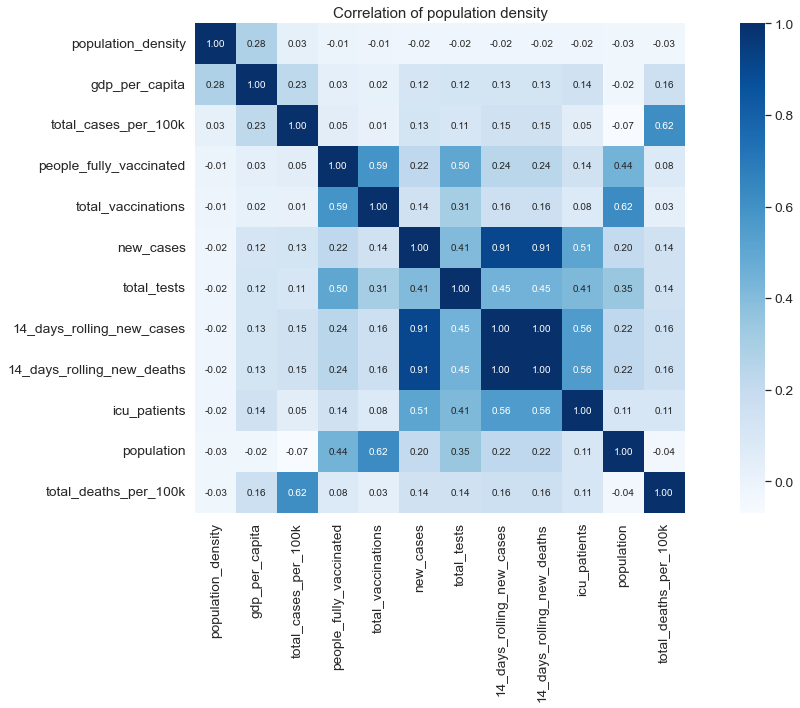

In [217]:
#Correlation of population density
corr = covid_data.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'population_density')['population_density'].index
cm = np.corrcoef(covid_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.title("Correlation of population density", size = 15)
plt.show()



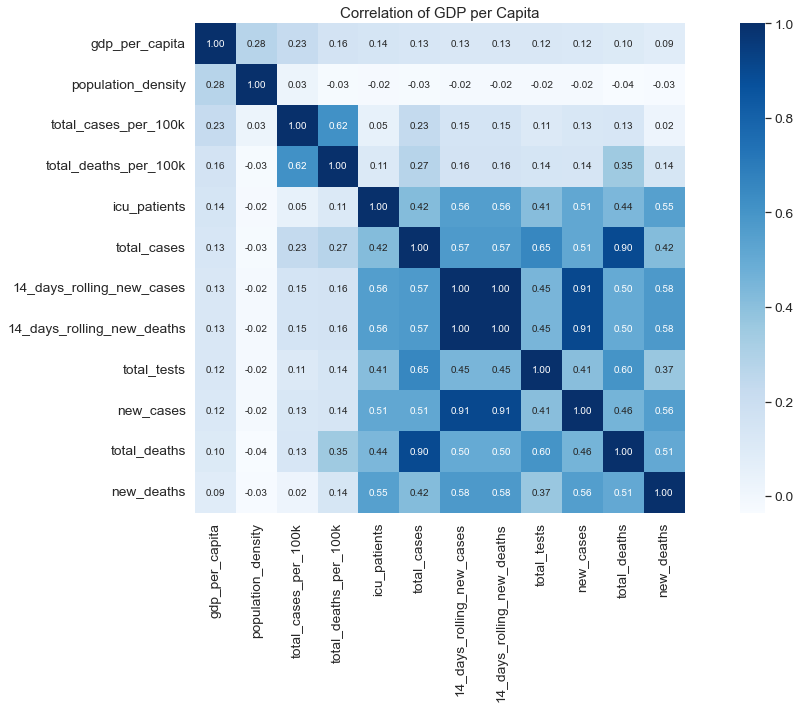

In [218]:
#Correlation of gdp
corr = covid_data.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'gdp_per_capita')['gdp_per_capita'].index
cm = np.corrcoef(covid_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.title("Correlation of GDP per Capita", size = 15)
plt.show()

darker shadeing represent positive correlation.  from this we can infer that population density and gdp are not correlated to the mortality rate of a country.  gdp appears to have slightly better correllation than the population density

In [54]:
# not sure if we need some sort of index key to view the data, I created one I can insert if I need it later
pk = covid_data["iso_code"]+str(covid_data['date'])

print(pk.head())

#insert pk into covid_data
#del covid_data["pk"] #delete pk column
#covid_data.insert(0, 'pk', pk)


#covid_data["pk"]
#covid_data.info()

9371    ABW9371     2020-03-13\n9372     2020-03-14\n9...
9372    ABW9371     2020-03-13\n9372     2020-03-14\n9...
9373    ABW9371     2020-03-13\n9372     2020-03-14\n9...
9374    ABW9371     2020-03-13\n9372     2020-03-14\n9...
9375    ABW9371     2020-03-13\n9372     2020-03-14\n9...
Name: iso_code, dtype: object


summary of data exploration and preparation:  the datre is ready for anlyis but my confidence level is not high after reviewing the .corr() results.  I decided to leave the gdp data source at this point as the COVID gdp per capita looks to be a good representation of the data.  next step is to pefrom regession and machine learning although given the little correlation I am seeing not sure how fruitful it will be

<h2 style="color:#00008b;">Analysis</h2>

<h3>Basic Charts</h3>

In [100]:
# Set chart sizes to wide

plt.rcParams['figure.figsize'] = [15, 5]

#list of iso codes
Country_review = covid_data["iso_code"].tolist()

# list the country codes    
country_iso_list = unique(Country_review)


ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB VAT VCT VEN VGB VIR VNM VUT WLF WSM YEM ZAF ZMB ZWE


Total Cases vs 14_days_rolling_new_cases for: GBR



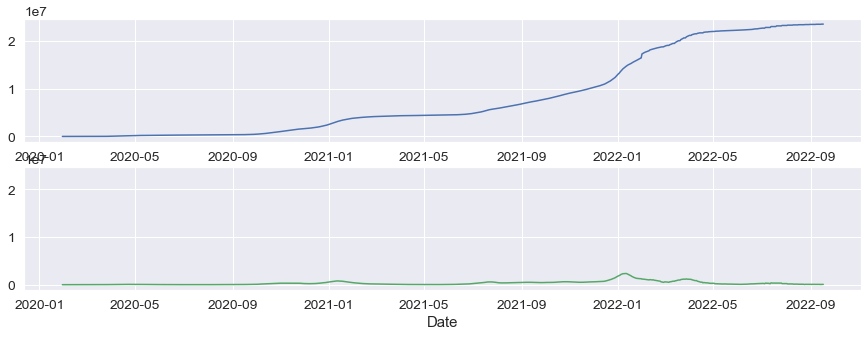

In [223]:
country_use_code = "GBR"

#covid_data = covid_data.set_index("pk")

iso_use = country_use_code

print("Total Cases vs "+new_column+" for: "+iso_use)


# Basic plot of total covid cases over time
fig, ax=plt.subplots(2,1, sharey=True)


data=covid_data[covid_data["iso_code"]==iso_use]
data1=covid_data[covid_data["iso_code"]==iso_use]

ax[0].plot(data["date"], data["total_cases"], color='b')
print()
ax[1].plot(data["date"], data[new_column], color='g') #using the new_column function above that identifies the name of the new column

ax[1].set_xlabel("Date")

plt.show()

the charts above give an indication of the total mortality per 100k people and rolling 14 day spikes representing the waves over time.  we can see that the total increases sharply between the end of 2020, 2021 and is now leveling off.

<h3>analysis with seaborn</h3>

I'm going to create a subset of the data as mentioned between year end totals/100k population to compare and see if the gdp, martality calssification impacts the results

In [163]:
# create a subset of the COVID data for use with seaborn analysis

covid_data_small = covid_data[['date',
                               'iso_code',
                               'location',
                               'total_cases',
                               'total_cases_per_100k',
                               'total_deaths',
                               'total_deaths_per_100k',
                               'population',
                               'population_density',
                               'gdp_per_capita',
                               'extreme_poverty',
                               'people_fully_vaccinated',
                               'mortality'
                              ]]


#covid_data_small.fillna(0)
covid_data_small

last_date_n = str(last_date)

print("last date to use: "+last_date_n)




last date to use: 2022-09-15 00:00:00


In [164]:
# filter on dates for analysis
covid_data_sns = covid_data_small[covid_data_small["date"].isin(["2020-12-31","2021-12-31",last_date_n])]

print("covid_data_sns.shape") 
print(covid_data_sns.shape) 
print("-"*100)
print()
print(covid_data_sns.head())
print("-"*100)
print(covid_data_sns.tail())
print("-"*100)
print()
print("Null data")
print(covid_data_sns.isna().sum())
print("-"*100)
print()
print(covid_data_sns.corr())
print("-"*100)

covid_data_sns.shape
(658, 13)
----------------------------------------------------------------------------------------------------

            date iso_code     location  total_cases  total_cases_per_100k  \
9664  2020-12-31      ABW        Aruba       5489.0           5152.249005   
10029 2021-12-31      ABW        Aruba      20461.0          19205.714500   
10287 2022-09-15      ABW        Aruba      42970.0          40333.783885   
311   2020-12-31      AFG  Afghanistan      52330.0            130.500504   
676   2021-12-31      AFG  Afghanistan     158084.0            394.229728   

       total_deaths  total_deaths_per_100k  population  population_density  \
9664           49.0              45.993842    106536.0             584.800   
10029         181.0             169.895622    106536.0             584.800   
10287         228.0             214.012165    106536.0             584.800   
311          2189.0               5.458926  40099462.0              54.422   
676          7

I can see that we are getting multiple dates and requested columns of data back so good to move forward


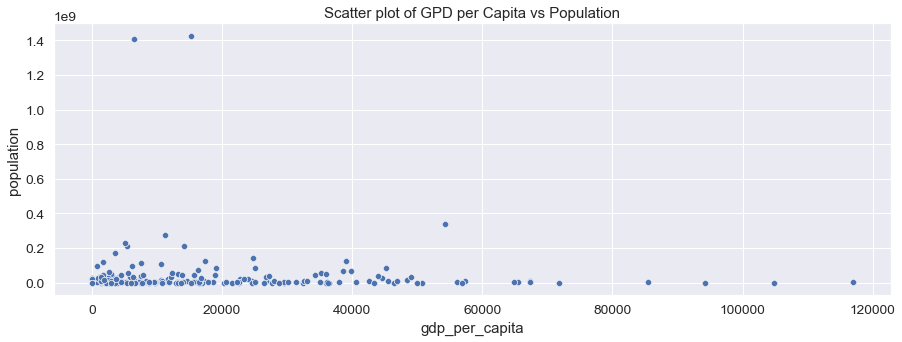

In [108]:
sns.scatterplot(x="gdp_per_capita",y="population",data=covid_data_sns)
plt.title("Scatter plot of GPD per Capita vs Population")
plt.show()

looks like a few outliers with a few high gdp nodes with relatively low populations

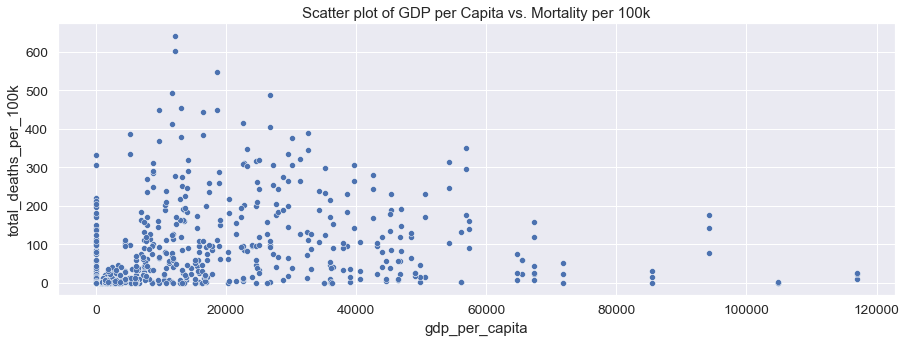

In [225]:
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=covid_data_sns)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Scatter plot of GDP per Capita vs. Mortality per 100k", size = 15)
plt.show()

looks like an intersting visual and that we can what appears to be a pattern between countries, GDP and mortality

In [148]:
#create data sets for each year
df_2020 = covid_data_sns[covid_data_sns["date"].isin(["2020-12-31"])]
df_2021 = covid_data_sns[covid_data_sns["date"].isin(["2021-12-31"])]
df_2022 = covid_data_sns[covid_data_sns["date"].isin(["2022-09-15"])]


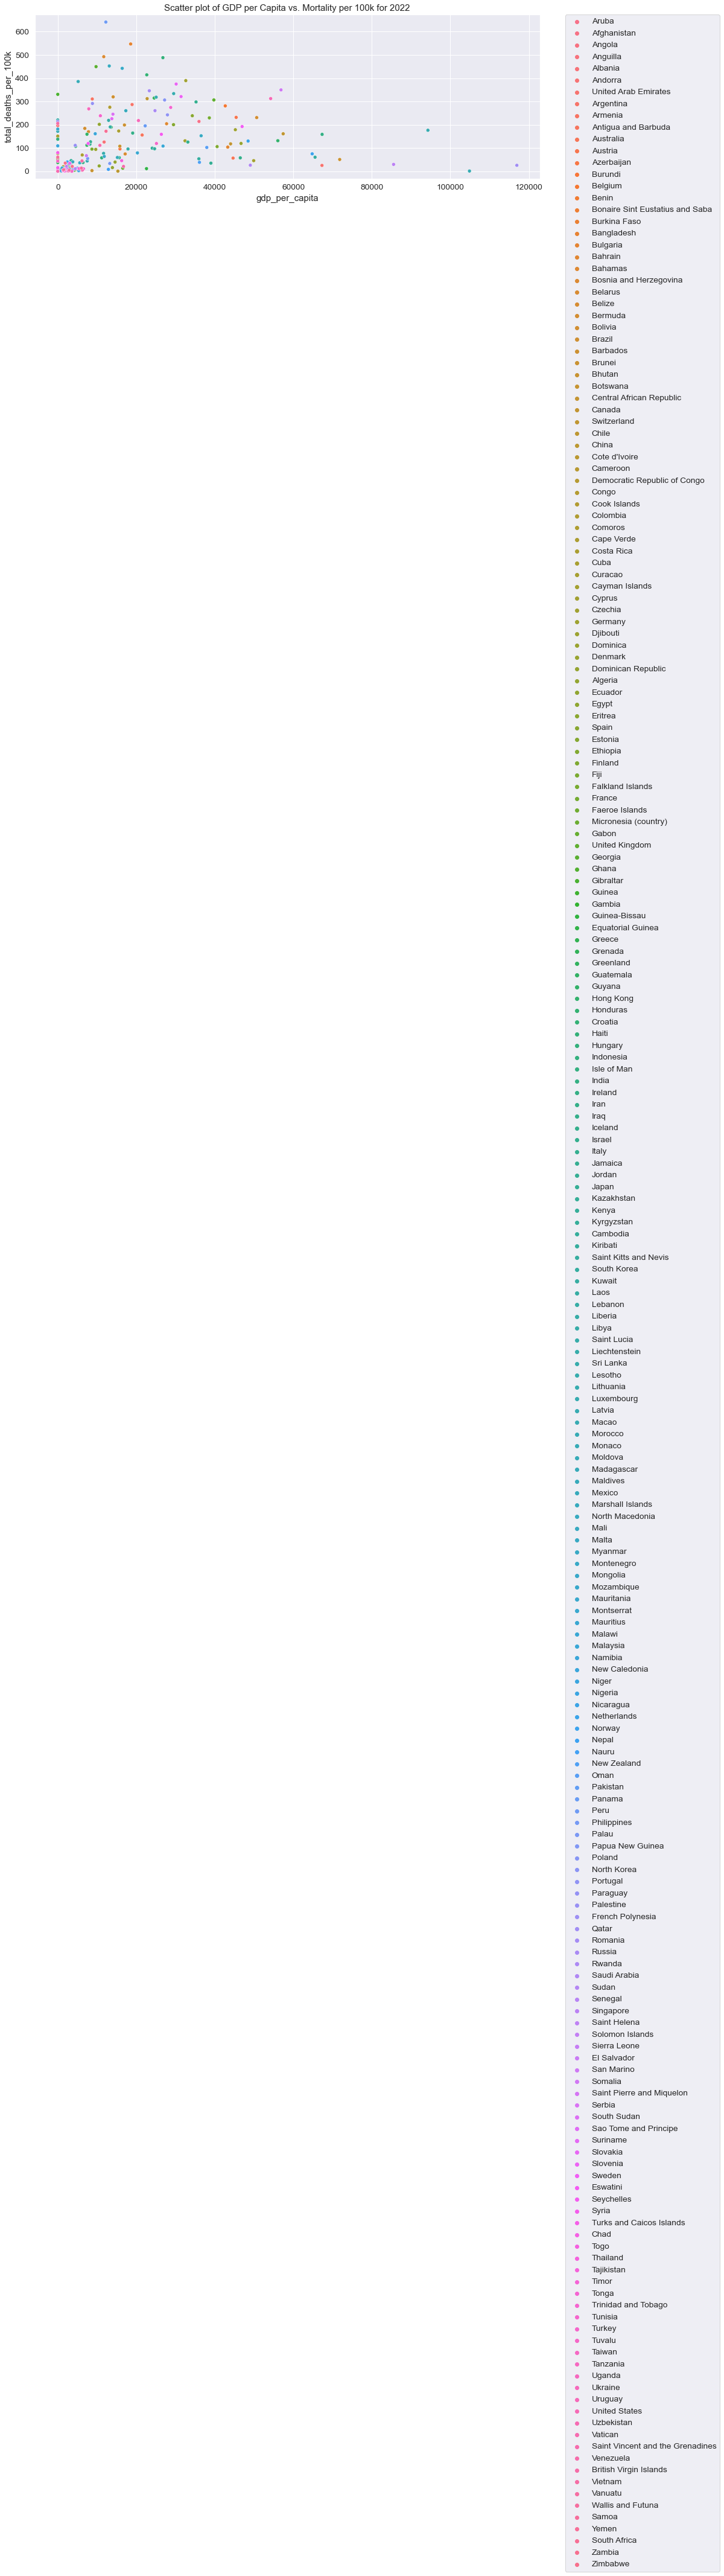

In [226]:
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=df_2022, hue="location")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Scatter plot of GDP per Capita vs. Mortality per 100k for 2022", size = 15)
plt.show()

only displaying a single point in time gets rid of some noise and it would appear looking at the latest data here that there appears to be a relationship between gdp and mortality rates.  it might be easier to review by the top and bottom countries

In [189]:
# Top n data; use: top_n_parameter 
#https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
#df.nlargest; df.nsmallest


print("Top countries by cases and deaths:")
print()

df_2020 = covid_data_sns[covid_data_sns["date"].isin(["2020-12-31"])]
df_2021 = covid_data_sns[covid_data_sns["date"].isin(["2021-12-31"])]
df_2022 = covid_data_sns[covid_data_sns["date"].isin([last_date_n])]



Top countries by cases and deaths:



In [230]:
print("creating a sets of top n cases and deaths per 100k of the population")
print()
print("Bottom countries by cases and deaths:")
print()

top_df_2020_cases_per_100k = df_2020.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2020_cases_per_100k")
print(top_df_2020_cases_per_100k)
print("-"*100)

top_df_2020_deaths_per_100k = df_2020.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2020_deaths_per_100k")
print(top_df_2020_deaths_per_100k)
print("-"*100)

top_df_2021_cases_per_100k = df_2021.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2021_cases_per_100k")
print(top_df_2021_cases_per_100k)
print("-"*100)

top_df_2021_deaths_per_100k = df_2021.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2021_deaths_per_100k")
print(top_df_2021_deaths_per_100k)
print("-"*100)

top_df_2022_cases_per_100k = df_2022.nlargest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("top_df_2022_cases_per_100k")
print(top_df_2022_cases_per_100k)
print("-"*100)

top_df_2022_deaths_per_100k = df_2022.nlargest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("top_df_2022_deaths_per_100k")
print(top_df_2022_deaths_per_100k)




creating a sets of top n cases and deaths per 100k of the population

Bottom countries by cases and deaths:

top_df_2020_cases_per_100k
             date iso_code       location  total_cases  total_cases_per_100k  \
4061   2020-12-31      AND        Andorra       8049.0          10184.224511   
130236 2020-12-31      MNE     Montenegro      48247.0           7684.368624   
115740 2020-12-31      LUX     Luxembourg      46415.0           7260.046205   
168576 2020-12-31      SMR     San Marino       2333.0           6913.411960   
49975  2020-12-31      CZE        Czechia     718661.0           6837.390291   
15320  2020-12-31      BHR        Bahrain      92675.0           6333.439261   
75178  2020-12-31      GIB      Gibraltar       2040.0           6244.260790   
72367  2020-12-31      GEO        Georgia     227420.0           6051.655411   
205151 2020-12-31      USA  United States   20221641.0           6000.529250   
177397 2020-12-31      SVN       Slovenia     122152.0          

In [228]:
print("creating a sets of bottom n cases and deaths per 100k of the population")
print()

# Bottom n data; use: top_n_parameter 
#https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
#df.nlargest; df.nsmallest
print("Bottom countries by cases and deaths:")
print()

bot_df_2020_cases_per_100k = df_2020.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2020_cases_per_100k")
print(top_df_2020_cases_per_100k)
print("-"*100)
print()

bot_df_2020_deaths_per_100k = df_2020.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2020_deaths_per_100k")
print(top_df_2020_deaths_per_100k)
print("-"*100)
print()

bot_df_2021_cases_per_100k = df_2021.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2021_cases_per_100k")
print(top_df_2021_cases_per_100k)
print("-"*100)
print()

bot_df_2021_deaths_per_100k = df_2021.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2021_deaths_per_100k")
print(top_df_2021_deaths_per_100k)
print("-"*100)
print()

bot_df_2022_cases_per_100k = df_2022.nsmallest(n=top_n_parameter, columns=["total_cases_per_100k"])
print("bot_df_2022_cases_per_100k")
print(top_df_2022_cases_per_100k)
print("-"*100)
print()

bot_df_2022_deaths_per_100k = df_2022.nsmallest(n=top_n_parameter, columns=["total_deaths_per_100k"])
print("bot_df_2022_deaths_per_100k")
print(top_df_2022_deaths_per_100k)
print("-"*100)
print()


creating a sets of bottom n cases and deaths per 100k of the population

Bottom countries by cases and deaths:

bot_df_2020_cases_per_100k
             date iso_code       location  total_cases  total_cases_per_100k  \
4061   2020-12-31      AND        Andorra       8049.0          10184.224511   
130236 2020-12-31      MNE     Montenegro      48247.0           7684.368624   
115740 2020-12-31      LUX     Luxembourg      46415.0           7260.046205   
168576 2020-12-31      SMR     San Marino       2333.0           6913.411960   
49975  2020-12-31      CZE        Czechia     718661.0           6837.390291   
15320  2020-12-31      BHR        Bahrain      92675.0           6333.439261   
75178  2020-12-31      GIB      Gibraltar       2040.0           6244.260790   
72367  2020-12-31      GEO        Georgia     227420.0           6051.655411   
205151 2020-12-31      USA  United States   20221641.0           6000.529250   
177397 2020-12-31      SVN       Slovenia     122152.0       

In [193]:

# min value in the Top mortality (top deaths) data
print("min of 2020 top deaths/ 100k: "+str(top_df_2020_deaths_per_100k["total_deaths_per_100k"].min()))
print("max of 2020 top deaths/ 100k: "+str(top_df_2020_deaths_per_100k["total_deaths_per_100k"].max()))
print("-"*100)
print("min of 2021 top deaths/ 100k: "+str(top_df_2021_deaths_per_100k["total_deaths_per_100k"].min()))
print("max of 2021 top deaths/ 100k: "+str(top_df_2021_deaths_per_100k["total_deaths_per_100k"].max()))
print("-"*100)

# max value in the bottom mortality (bottom deaths) data
print("max of 2022 lowest deaths/ 100k: "+str(top_df_2022_deaths_per_100k["total_deaths_per_100k"].max()))
print("min of 2022 lowest deaths/ 100k: "+str(top_df_2020_deaths_per_100k["total_deaths_per_100k"].min()))


min of 2020 top deaths/ 100k: 110.17291820279239
max of 2020 top deaths/ 100k: 276.04537169166724
----------------------------------------------------------------------------------------------------
min of 2021 top deaths/ 100k: 308.80746576160647
max of 2021 top deaths/ 100k: 601.1779992283662
----------------------------------------------------------------------------------------------------
max of 2022 lowest deaths/ 100k: 641.3524330906594
min of 2022 lowest deaths/ 100k: 110.17291820279239


Top and Bottom Mortality vs GDP per capita



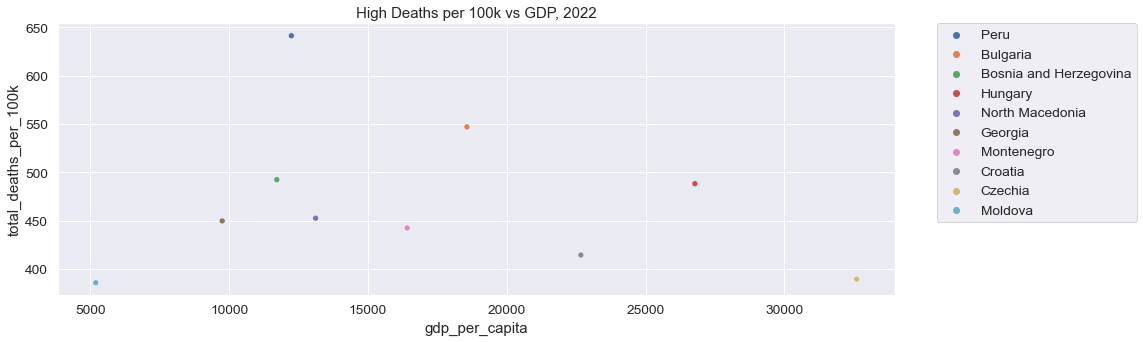

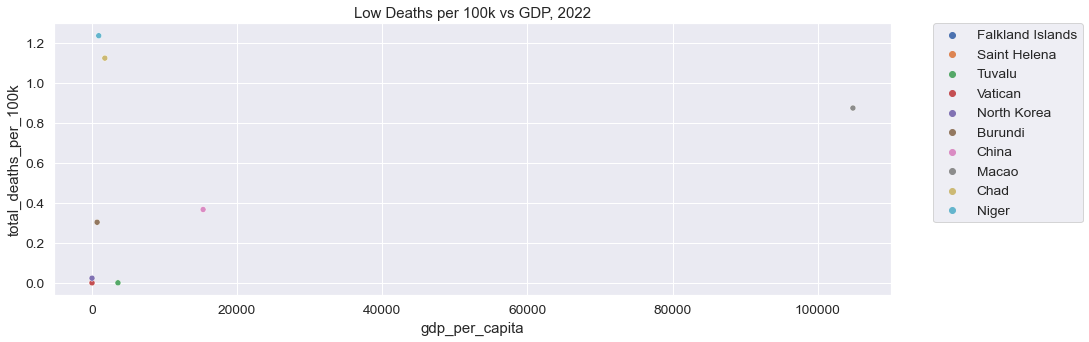

In [179]:
print("Top and Bottom Mortality vs GDP per capita")
print()

#Top deaths vs gdp
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=top_df_2022_deaths_per_100k, hue="location")
plt.title("High Deaths per 100k vs GDP, 2022", size = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#bottom deaths vs gdp
sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2022_deaths_per_100k, hue="location")
plt.title("Low Deaths per 100k vs GDP, 2022", size = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

this looks strange, high mortality and gdp does not look related.  it appears from the top chart that the top gdp countries also have higer mortality, for the most part these countries look like smaller nations.  lets look by population density

Top and Bottom Mortality vs Population Density


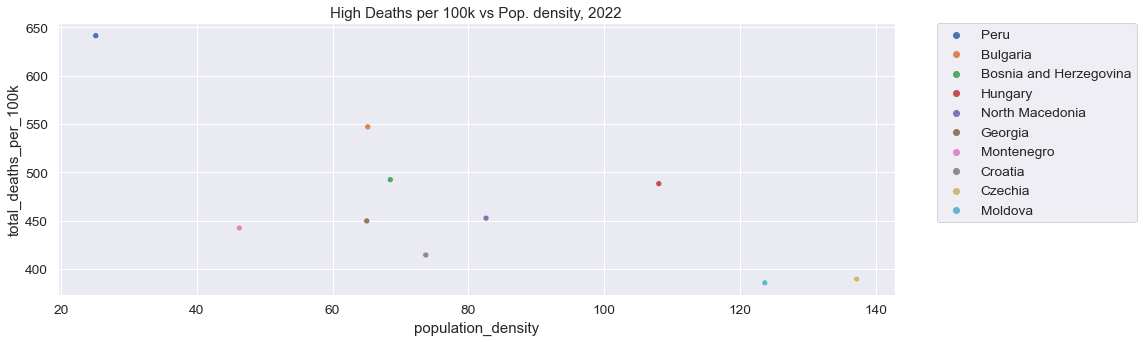

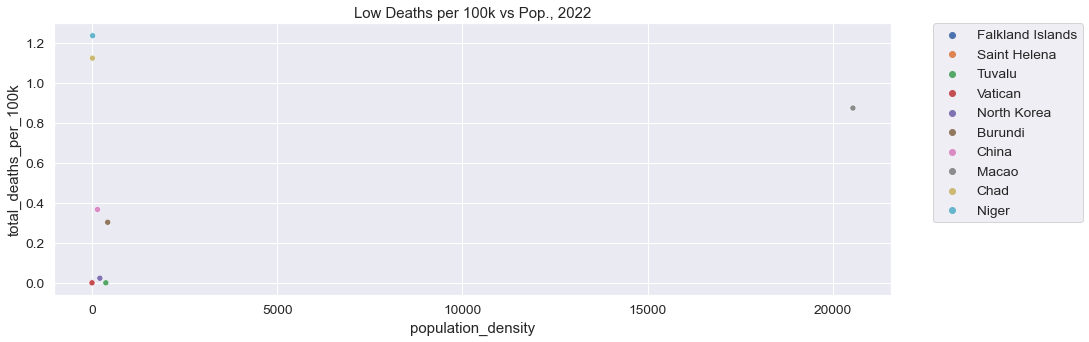

In [180]:
print("Top and Bottom Mortality vs Population Density")

#Top deaths vs population_density
sns.scatterplot(x="population_density",y="total_deaths_per_100k",data=top_df_2022_deaths_per_100k, hue="location")
plt.title("High Deaths per 100k vs Pop. density, 2022", size = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#bottom deaths vs population_density
sns.scatterplot(x="population_density",y="total_deaths_per_100k",data=bot_df_2022_deaths_per_100k, hue="location")
plt.title("Low Deaths per 100k vs Pop., 2022", size = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

this looks strange as well, higher mortality and lower density looks negatively related, it's difficult to tell because of the outlier, Macao.  it appears from the top chart that the lesser dense countries also have higer mortality, for the most part these countries look like smaller nations. 

In [194]:
# calculate the threshold to use for the "high" and "low" mortality column

# min value in the Top mortality (top deaths) data
print("min 2020 top deaths/ 100k: "+str(top_df_2020_cases_per_100k["total_deaths_per_100k"].min()))
print("max 2020 top deaths/ 100k: "+str(top_df_2020_cases_per_100k["total_deaths_per_100k"].max()))
print("-"*100)

# max value in the bottom mortality (bottom deaths) data
print("max 2022 lowest deaths/ 100k: "+str(bot_df_2022_cases_per_100k["total_deaths_per_100k"].max()))
print("min 2022 lowest deaths/ 100k: "+str(bot_df_2022_cases_per_100k["total_deaths_per_100k"].min()))


min 2020 top deaths/ 100k: 21.426385062748697
max 2020 top deaths/ 100k: 174.83553606353345
----------------------------------------------------------------------------------------------------
max 2022 lowest deaths/ 100k: 6.5339380778536755
min 2022 lowest deaths/ 100k: 0.02310188288431166


I used this to set the group bads for the "Mortality" column.  Using the 2020 top 10 records to set the lower limit of "high" mortality and current 2022 bottom 10 records to set the higher limit for the "low" mortality

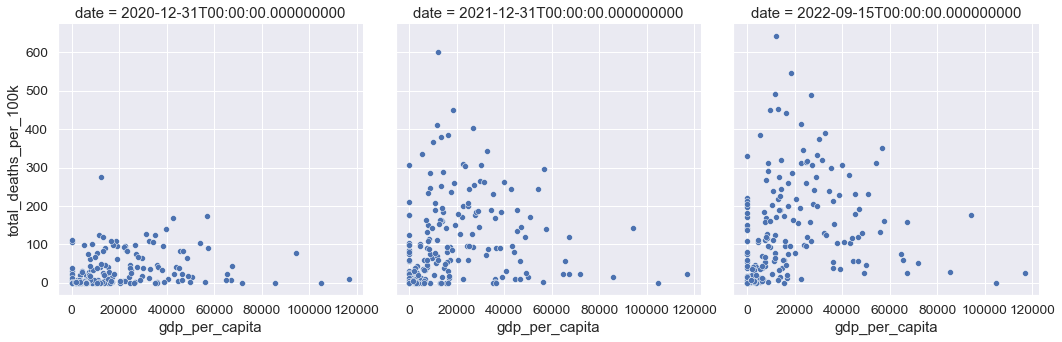

In [69]:
#Mortality per 100k and GDP per capita

#High mortality vs gdp
sns.relplot(x="gdp_per_capita",
            y="total_deaths_per_100k",
            data=covid_data_sns, 
            kind="scatter",
            col = "date")
plt.show()

#bottom deaths vs gdp
#sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2020_cases_per_100k, hue="location")
#plt.show()

we can observe from this that there are expected results that over time lower gdp per capita records had higher mortality per 100k of the population. However, there are some interesting results where lower gdp did not have a high mortality.  notice the skew to the upper left over time which suggests lower gdp does impact higher mortality

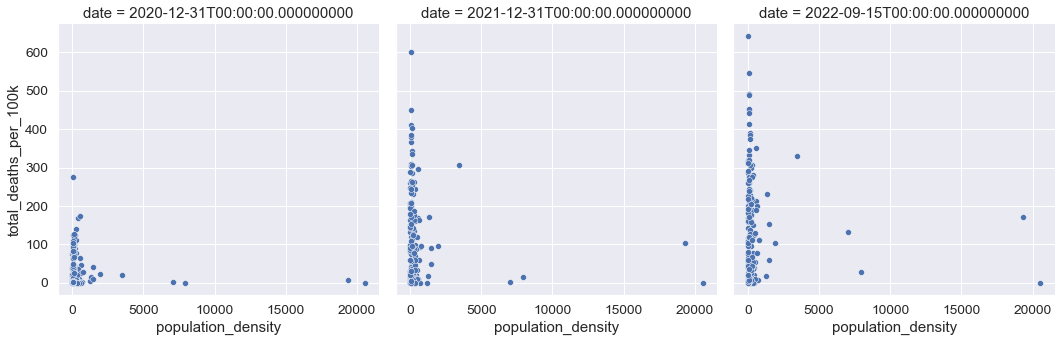

In [70]:
#Mortality per 100k and population density

#High mortality vs pop density
sns.relplot(x="population_density",
            y="total_deaths_per_100k",
            data=covid_data_sns, 
            kind="scatter",
            col = "date")
plt.show()

#bottom deaths vs gdp
#sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_100k",data=bot_df_2020_cases_per_100k, hue="location")
#plt.show()

we can observe here that a higher density in the population does have a more significant impact on mortality

In [160]:
covid_temp = covid_data_sns
covid_temp.sort_values("population_density", axis = 0, ascending = False, inplace = True, na_position ='last')
covid_temp

C:\Users\Phillip\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,iso_code,location,total_cases,total_cases_per_100k,total_deaths,total_deaths_per_100k,population,population_density,gdp_per_capita,extreme_poverty,people_fully_vaccinated,mortality
117333,2022-09-15,MAC,Macao,793.0,115.495473,6.0,0.873862,686607.0,20546.766,104861.851,0.0,0.0,
116710,2020-12-31,MAC,Macao,46.0,6.699611,0.0,0.000000,686607.0,20546.766,104861.851,0.0,0.0,
117075,2021-12-31,MAC,Macao,79.0,11.505854,0.0,0.000000,686607.0,20546.766,104861.851,0.0,0.0,
128399,2020-12-31,MCO,Monaco,875.0,2385.106035,3.0,8.177506,36686.0,19347.500,0.000,0.0,0.0,
128764,2021-12-31,MCO,Monaco,4985.0,13588.289811,38.0,103.581748,36686.0,19347.500,0.000,0.0,0.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195753,2021-12-31,TKL,Tokelau,0.0,0.000000,0.0,0.000000,1849.0,0.000,0.000,0.0,0.0,
131515,2021-12-31,MSR,Montserrat,46.0,1041.430835,1.0,22.639801,4417.0,0.000,0.000,0.0,0.0,
163959,2022-09-15,SHN,Saint Helena,7.0,129.533679,0.0,0.000000,5404.0,0.000,0.000,0.0,0.0,
25156,2022-09-15,BES,Bonaire Sint Eustatius and Saba,11306.0,42335.055793,38.0,142.290122,26706.0,0.000,0.000,0.0,0.0,high


<h3>Regression analysis</h3>

In [73]:
# Machine Learning


In [74]:
# Machine learning KNN data

In [75]:
covid_data_sns.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 40923 to 156534
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     658 non-null    datetime64[ns]
 1   iso_code                 658 non-null    object        
 2   location                 658 non-null    object        
 3   total_cases              658 non-null    float64       
 4   total_cases_per_100k     658 non-null    float64       
 5   total_deaths             658 non-null    float64       
 6   total_deaths_per_100k    658 non-null    float64       
 7   population               658 non-null    float64       
 8   population_density       658 non-null    float64       
 9   gdp_per_capita           658 non-null    float64       
 10  extreme_poverty          658 non-null    float64       
 11  people_fully_vaccinated  658 non-null    float64       
 12  mortality                658 

In [195]:
date_list = unique(covid_data_sns["date"])
print("we have the expected 3 dates selected")

2020-12-31 00:00:00 2021-12-31 00:00:00 2022-09-15 00:00:00
we have the expected 3 dates selected


In [76]:
#create 2 sets of data for the review removing date, iso code, location, as this was causing an issue with the regression, 
#and even fewer value columns in the second set 

covid_data_ml = covid_data_sns

covid_data_ml1 = covid_data_ml.drop(["date","iso_code","location"],axis=1)

covid_data_ml2 = covid_data_ml.drop(["date","iso_code","location","total_cases", "total_deaths"],axis=1)

covid_data_ml2

,total_cases_per_100k,total_deaths_per_100k,population,population_density,gdp_per_capita,extreme_poverty,people_fully_vaccinated,mortality
40923,68.606177,0.366507,1.425893e+09,147.674,15308.712,0.7,0.0,
40665,8.076901,0.325129,1.425893e+09,147.674,15308.712,0.7,0.0,
40300,6.569846,0.324989,1.425893e+09,147.674,15308.712,0.7,0.0,
90215,3163.108889,37.531015,1.407564e+09,450.419,6426.674,21.2,945888274.0,
89592,730.816514,10.585239,1.407564e+09,450.419,6426.674,21.2,0.0,
...,...,...,...,...,...,...,...,...
195753,0.000000,0.000000,1.849000e+03,0.000,0.000,0.0,0.0,
211001,5675.146771,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210378,5283.757339,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,
210743,5283.757339,0.000000,5.110000e+02,0.000,0.000,0.0,0.0,


In [77]:
covid_data_ml2.corr()

,total_cases_per_100k,total_deaths_per_100k,population,population_density,gdp_per_capita,extreme_poverty,people_fully_vaccinated
total_cases_per_100k,1.000000,0.565030,-0.084047,0.038198,0.281010,-0.266005,0.016199
total_deaths_per_100k,0.565030,1.000000,-0.048317,-0.033792,0.187789,-0.265438,0.049127
population,-0.084047,-0.048317,1.000000,-0.025052,-0.022257,0.028340,0.542187
population_density,0.038198,-0.033792,-0.025052,1.000000,0.269128,-0.068123,-0.009032
gdp_per_capita,0.281010,0.187789,-0.022257,0.269128,1.000000,-0.314938,0.019586
extreme_poverty,-0.266005,-0.265438,0.028340,-0.068123,-0.314938,1.000000,0.011645
people_fully_vaccinated,0.016199,0.049127,0.542187,-0.009032,0.019586,0.011645,1.000000


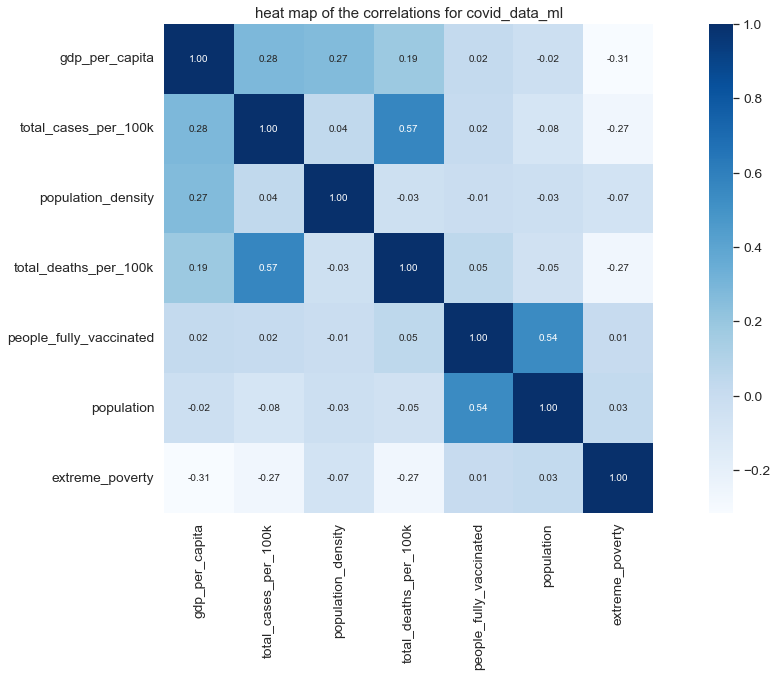

In [197]:
#heat map of the correlations for covid_data_ml2

Corr_data = covid_data_ml2

#Correlation of gdp
corr = Corr_data.corr()
plt.figure(figsize=(20, 9))

k = 12 #number of variables for heatmap

cols = corr.nlargest(k, 'gdp_per_capita')['gdp_per_capita'].index
cm = np.corrcoef(Corr_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.title("heat map of the correlations for covid_data_ml")
plt.show()

<h2 style="color:#00008b;">Results</h2>
(Include the charts and describe them)

<h4>Supervised learning with classification</h4>

In [202]:
print("training and testing the data")
#from datacamp
print()

#covid_data_ml
#covid_data_ml1
#covid_data_ml2 

ml_data = covid_data_ml1

X = ml_data.drop("mortality",axis=1).values #drop target value
y = ml_data["mortality"].values #target observations

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

#fit the classiier to the training data
knn.fit(X_train, y_train)

#print the accuracy
print("The knn score:")
print(knn.score(X_test, y_test))
print()

y_pred_ = knn.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_))
print()

print("Classification report:")
print(classification_report(y_test, y_pred_))

training and testing the data

The knn score:
0.8131313131313131

Confusion matrix:
[[96 19]
 [18 65]]

Classification report:
              precision    recall  f1-score   support

                   0.84      0.83      0.84       115
        high       0.77      0.78      0.78        83

    accuracy                           0.81       198
   macro avg       0.81      0.81      0.81       198
weighted avg       0.81      0.81      0.81       198



The knn score suggest there are tight relationships with the data.  However, the "high" mortality classification prediction is not as high suggesting mortality from COVID is not that correlated to the gdp per capita or the population density

In [80]:
#model complexity
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)


In [81]:
# loop through neighbors array
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor]=knn.score(X_train, y_train)
    test_accuracies[neighbor]=knn.score(X_test,y_test)

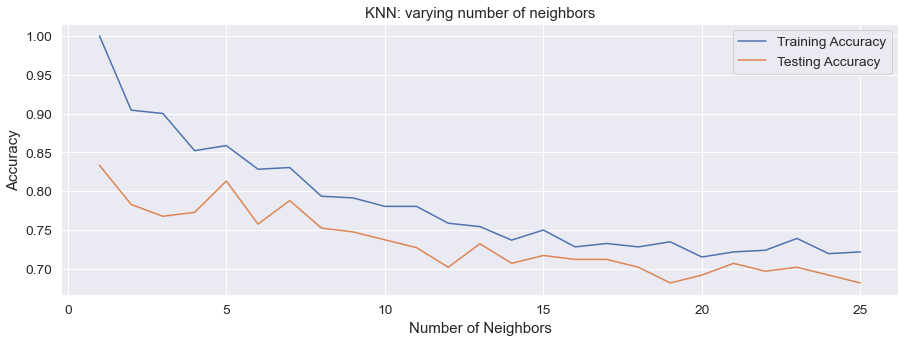

In [82]:
# plot training and test values
#plt.figure(figuresize=(8,6))
plt.title("KNN: varying number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()


this shows k of 5 is a good choice as this displays the highest testing accuracy and thetraining score

<h4>Supervised learning with regression</h4>

[90.5815328  90.5815328  90.5815328  56.07236769 56.07236769 56.07236769
 89.73984585 89.73984585 89.73984585 82.16466326]


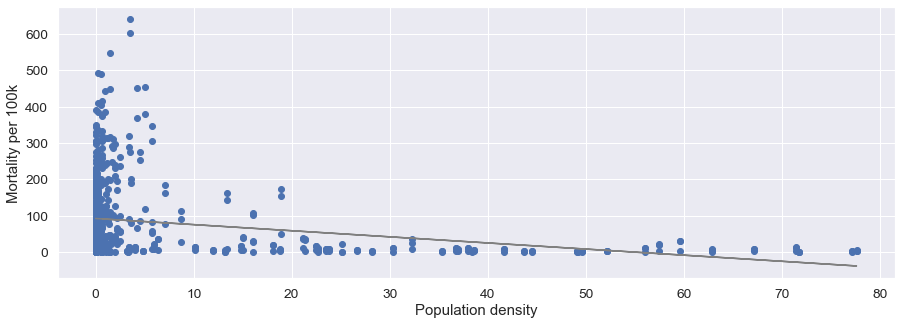

In [212]:
#training and testing the data
#from datacamp

#covid_data_ml
#covid_data_ml1
#covid_data_ml2 
#print(ml_data)

ml_data = covid_data_ml1


X = ml_data.drop("total_deaths_per_100k",axis=1).values #drop target value
y = ml_data["total_deaths_per_100k"].values #target observations


# predicting mortality using population density

#predict using pop_density (6)
X_pop_d = X[:,6] 
#print(y.shape, X_pop_d.shape) # check shape
# reshape
X_pop_d = X_pop_d.reshape(-1,1) 
#print(X_pop_d.shape) #check shape

#regression model
reg = LinearRegression()
reg.fit(X_pop_d,y)
predictions = reg.predict(X_pop_d)
print(predictions[:10])

#plot Total_deaths per 100k vs. population density with regression
plt.scatter(X_pop_d, y)
plt.plot(X_pop_d, predictions, color = "gray")
plt.ylabel("Mortality per 100k")
plt.xlabel("Population density")
plt.show()


Weak negative correlation. The higher the population density the less likey the mortality from COVID, this is unexpected.

[ 77.8401708   77.8401708   77.8401708  183.85742766  77.8401708
 145.45094741  77.84519511 101.32152506  77.8401708   90.58014497]


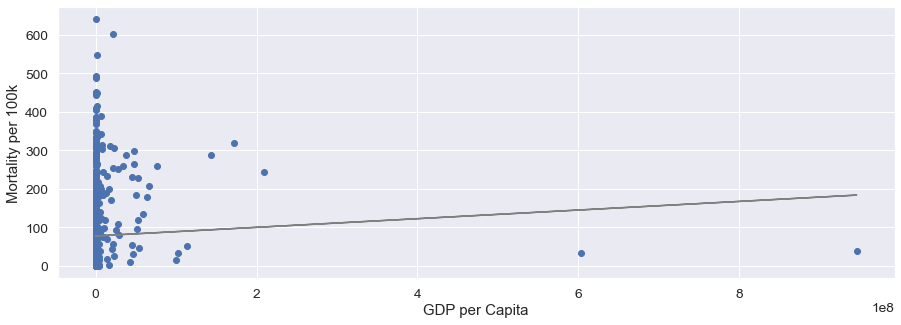

In [215]:
# predicting mortality using gdp

#predict using gdp_per_capita (7)
X_gdp_c = X[:,7] 

#print(ml_data)

# reshape
X_gdp_c = X_gdp_c.reshape(-1,1) 
#print(X_gdp_c.shape) #check shape

#regression model
reg = LinearRegression()
reg.fit(X_gdp_c,y)
predictions = reg.predict(X_gdp_c)
print(predictions[:10])

#plot Total_deaths per 100k vs. population density
plt.scatter(X_gdp_c, y)
plt.plot(X_gdp_c, predictions, color = "gray")
plt.ylabel("Mortality per 100k")
plt.xlabel("GDP per Capita")
plt.show()


Weak positive correlation. The higher the gdp per capita the less likey the mortality from COVID, this is somewhat expected, I would have expected the line to be steeper.

In [216]:
#Linear regression using all features

# need to drop mortality
covid_data_sns.drop(["date","iso_code","location","total_cases", "total_deaths","mortality"],axis=1)


ml_data_r = covid_data_sns.drop(["date","iso_code","location","total_cases", "total_deaths","mortality"],axis=1)

ml_data_r



X = ml_data_r.drop("total_deaths_per_100k",axis=1).values #drop target value
y = ml_data_r["total_deaths_per_100k"].values #target observations


#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21)
knn = KNeighborsClassifier(n_neighbors=5)

#fit the linear regression to the training data
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)


#predict on the test set
y_pred = reg_all.predict(X_test)

r_score = reg_all.score(X_test, y_test)

print("Predictions: {}, Actual Values: {}".format(y_pred[:4], y_test[:4]))
print("There is a large gap between the predictions and test data")
print("The model only explains about %5.2f"%(r_score*100)+"% of mortality level variance" )


Predictions: [68.0168901  25.17694341 27.98660358 31.63819871], Actual Values: [39.43199932  0.36650705  6.75252536  1.21709878]
There is a large gap between the predictions and test data
The model only explains about 30.56% of mortality level variance


per the charts and analysis above, the results are not encoraging based on my inital hypothesis: that higher population density and lower GDP per capita for a country would have a negative impact on COVID mortality (higher deaths).  I beleive there may be some outliers as we have seen in the scatter plot data that need to be removed which would potentially provide better results.

<h2 style="color:#00008b;">Insights</h2>

<h2 style="color:#00008b;">References</h2>
HTML Code help: <a href="https://www.w3schools.com/html/html_links.asp" target="_blank">W3 Schools</a> 

Our World in Data (OWID): <a href="https://ourworldindata.org/coronavirus#explore-the-global-situation" target="_blank">https://ourworldindata.org/coronavirus#explore-the-global-situation</a> 

The World Bank GDP: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false" target="_blank">https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false</a>

Python:
    <p>formatting numbers: https://pythonguides.com/python-format-number-with-commas/#:~:text=Python%20format%20number%20with%20commas%20Let%20us%20see,comma%20to%20every%20thousand%20places%20starting%20from%20left.</p>
    <p>formatting dates: https://stackabuse.com/how-to-format-dates-in-python/</p>
    

SyntaxError: invalid syntax (Temp/ipykernel_2368/762129301.py, line 1)